### Análisis predictivo de la Menopausia
El objetivo de nuestro proyecto es identificar los factores de incidencia de la menopausia, con el objetivo de poder llegar a ella de una manera saludable, mejorar la calidad de vida de las mujeres que llegan a esa etapa de su vida. Para ello utilizaremos una base de datos de cancer de ovario, en ella encontramos nuestra variable de interés, permitiendonos encontrar algún resultado con respecto a nuestro objetivo. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
OvarianTotal = pd.read_csv('ovariantotal.csv')
Blood_Routine = pd.read_csv('OC_Blood_Routine.csv')
General_Chem= pd.read_csv('OC_Genarel_Chem.csv')
Marker = pd.read_csv('OC_Marker.csv')
#Visualizamos la estructura de nuestros datos
OvarianTotal
# Observemos como nuestra variable de interés se encuentra asignado como una variable binaria

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56,11,24,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16,28.5,4.67,0.273,183.94,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.20,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,34.24,23.98,61,39.9,95,9,13,0.02,0.30,3.21,2.62,2444.00,19.98,10.17,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13,32.1,10.50,0.417,934.10,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.50,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,1.50,18.40,39,45.4,77,9,18,0.03,0.60,3.80,2.57,56.08,12.18,10.17,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.70,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,2.75,16.60,45,39.2,26,16,17,0.05,0.74,5.27,2.35,2555.00,18.41,131.60,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17,26.9,4.76,0.372,853.50,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.50,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,2.36,19.97,45,35.0,47,21,27,0.01,0.10,4.89,2.48,1391.00,11.15,10.17,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.50,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.09,20.91,52,48.6,65,40,30,0.00,0.00,4.29,2.81,50.80,15.11,10.17,1.74,98.1,25.9,54.0,3.8,0.01,0.30,36,31.8,5.13,0.415,31.45,142.0,6.9,4.11,1.18,30.7,31.1,91.0,0,0.94,0.28,7.30,9.90,140.8,66.58,0.22,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5,1
345,2.00,12.14,37,46.1,49,9,20,0.00,0.00,3.12,2.29,21.93,0.62,10.17,1.67,103.6,25.0,67.0,5.9,0.02,0.30,9,27.4,4.59,0.285,44.44,80.0,11.3,3.64,1.39,23.3,18.9,67.2,0,0.77,0.32,5.40,11.90,137.1,66.58,0.31,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5,1
346,2.83,19.23,59,45.8,83,9,16,0.02,0.60,4.38,2.65,51.33,2.18,10.17,2.31,102.3,27.1,50.0,4.0,0.05,1.50,13,22.6,5.90,0.439,42.65,144.0,9.8,4.63,1.10,32.7,29.4,89.8,1,0.92,0.13,3.90,9.70,144.0,66.58,0.21,10.4,1.00,221,4.89,11.6,13.8,68.4,209.5,1
347,1.84,27.22,30,47.8,64,26,22,0.03,0.30,3.61,2.82,53.87,10.71,10.17,0.93,93.1,23.1,59.0,3.5,0.23,2.20,25,28.2,5.59,0.458,30.78,154.0,7.8,4.22,2.15,20.6,28.8,85.6,0,1.02,0.43,4.10,10.50,139.2,66.58,0.42,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7,1


#### Exploración inicial de datos

In [8]:
# Exploramos la base
print("Cantidad total de observaciones: ", OvarianTotal.shape[0])
print("Cantidad de instancias:",OvarianTotal.shape[1])
print(OvarianTotal['Menopause'].value_counts())

# Tipo de dato por cada columna, veamos como todos los tipos de datos de nuestra base son 
# numericos
data_types = OvarianTotal.dtypes
print("Tipos de datos")
print(data_types.value_counts())


Cantidad total de observaciones:  349
Cantidad de instancias: 50
Menopause
0    230
1    119
Name: count, dtype: int64
Tipos de datos
float64    42
int64       8
Name: count, dtype: int64


En nuestra variable de interés, debido a que está representada de una forma binaria y una cantidad total de 348 datos, tenemos 230 mujeres que no se encuentran y 119 que sí se encuentran en la menopausia. Por lo tanto, para la asignación de conjunto de entrenamiento y prueba se realizará por medio de muestreo aleatorio estratificado. Ahora veamos si existen valores faltantes en la base.

In [12]:
# Determinamos cuantos son los missing values que tenemos en nuestra base
missing_values = OvarianTotal.isnull().sum()
missing_values = missing_values[missing_values > 0]
# Veamos como no tenemos valores faltantes en nuestra base de datos
print(missing_values)
# Ahora, observemos estadisticas de cada una de uestras variables
OvarianTotal.describe()

Series([], dtype: int64)


,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,11.388367,19.320516,45.051576,41.077077,77.083095,18.011461,19.103152,0.028883,0.479771,4.011117,2.390630,345.776476,45.873381,10.171060,3.309140,100.812894,24.277880,64.250143,3.128653,0.066017,1.119112,21.303725,30.176791,5.334986,0.383874,183.948453,125.336103,5.961032,4.386447,1.557593,26.070831,28.777192,88.070201,0.340974,0.982693,0.355158,5.579083,10.039484,140.494842,66.576705,0.251450,14.330487,1.120602,255.432665,4.359513,13.549914,9.089685,71.078797,243.706590,0.510029
std,95.090229,4.342422,15.130949,5.604478,43.733473,11.080940,8.372143,0.020890,0.346230,1.285569,0.364975,777.057485,121.528096,14.056757,10.682624,2.985526,2.683421,11.714643,1.414186,0.067704,1.134829,17.907152,4.479258,1.215904,0.042177,369.280717,15.534192,2.910527,0.396798,0.561449,10.386006,2.569315,6.041754,0.474717,0.123643,0.150504,1.924260,1.733804,2.860347,9.979656,0.085062,2.991921,0.187649,95.241974,0.465894,1.802818,4.104614,7.258465,68.581936,0.500617
min,0.610000,6.200000,15.000000,22.000000,26.000000,4.000000,7.000000,0.000000,0.000000,1.120000,0.920000,3.750000,0.600000,0.200000,0.200000,84.600000,16.200000,38.200000,0.900000,0.000000,0.000000,4.000000,14.100000,3.570000,0.224000,16.710000,61.800000,1.000000,3.080000,0.350000,3.900000,17.700000,61.000000,0.000000,0.650000,0.070000,0.300000,5.060000,125.100000,37.200000,0.070000,8.800000,0.570000,74.000000,2.620000,10.920000,2.500000,32.900000,96.000000,0.000000
25%,1.670000,17.300000,33.000000,38.500000,60.000000,11.000000,14.000000,0.010000,0.200000,3.160000,2.320000,20.320000,8.340000,10.170000,0.850000,99.200000,22.400000,56.000000,2.200000,0.020000,0.300000,12.000000,27.100000,4.660000,0.362000,42.580000,119.000000,4.000000,4.150000,1.190000,18.400000,28.000000,85.600000,0.000000,0.900000,0.250000,4.400000,9.100000,138.900000,62.300000,0.192000,11.900000,1.000000,202.000000,4.110000,12.400000,6.300000,67.500000,200.100000,0.000000
50%,2.420000,19.820000,45.000000,41.900000,71.000000,15.000000,18.000000,0.030000,0.400000,3.830000,2.470000,49.280000,15.110000,10.170000,1.400000,100.900000,24.100000,63.300000,2.900000,0.050000,0.800000,16.000000,30.180000,5.080000,0.388000,54.940000,127.000000,5.500000,4.370000,1.500000,26.600000,29.300000,89.000000,0.000000,0.970000,0.320000,5.430000,10.300000,140.500000,66.580000,0.240000,13.800000,1.120000,236.000000,4.370000,13.100000,8.600000,72.200000,235.400000,1.000000
75%,3.770000,22.160000,57.000000,45.100000,86.000000,20.000000,22.000000,0.040000,0.700000,4.780000,2.580000,255.820000,34.220000,10.170000,2.300000,102.600000,26.000000,71.000000,3.700000,0.090000,1.500000,23.000000,32.800000,5.600000,0.410000,166.200000,135.000000,7.200000,4.650000,1.870000,32.800000,30.400000,91.500000,1.000000,1.050000,0.430000,6.550000,11.200000,142.400000,71.300000,0.300000,16.800000,1.240000,292.000000,4.660000,14.400000,10.700000,75.800000,276.600000,1.000000
max,1210.000000,33.330000,83.000000,51.500000,763.000000,86.000000,78.000000,0.120000,1.940000,10.190000,2.830000,5000.000000,1000.000000,158.500000,138.800000,109.400000,34.300000,114.000000,12.100000,0.400000,7.600000,176.000000,47.600000,12.440000,0.569000,3537.600000,189.000000,28.400000,5.400000,3.490000,51.600000,36.800

In [18]:
# Obtenemos los rangos de nuestras vaiables
ranges = OvarianTotal.agg(["min", "max"])
ranges

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
min,0.61,6.20,15,22.0,26,4,7,0.00,0.00,1.12,0.92,3.75,0.6,0.2,0.2,84.6,16.2,38.2,0.9,0.0,0.0,4,14.1,3.57,0.224,16.71,61.8,1.0,3.08,0.35,3.9,17.7,61.0,0,0.65,0.07,0.3,5.06,125.1,37.2,0.07,8.8,0.57,74,2.62,10.92,2.5,32.9,96.0,0
max,1210.00,33.33,83,51.5,763,86,78,0.12,1.94,10.19,2.83,5000.00,1000.0,158.5,138.8,109.4,34.3,114.0,12.1,0.4,7.6,176,47.6,12.44,0.569,3537.60,189.0,28.4,5.40,3.49,51.6,36.8,107.9,1,1.37,0.97,21.3,14.50,150.7,92.0,0.69,22.8,1.75,868,6.74,22.20,38.3,86.8,632.0,1


Veamos como en algunas variables tenemos resultados con cambios muy notorios, como en el CA125, CA19-9 y HE-4. Esto puede deberse a la existencia de datos atipicos. Para analizar mejor los resultados obtenidos, realizaremos histogramas, de esta manera podemos obsevar mejor la distribución de cada una de las variables.

/tmp/ipykernel_1329/2638686498.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap(paleta, 30)


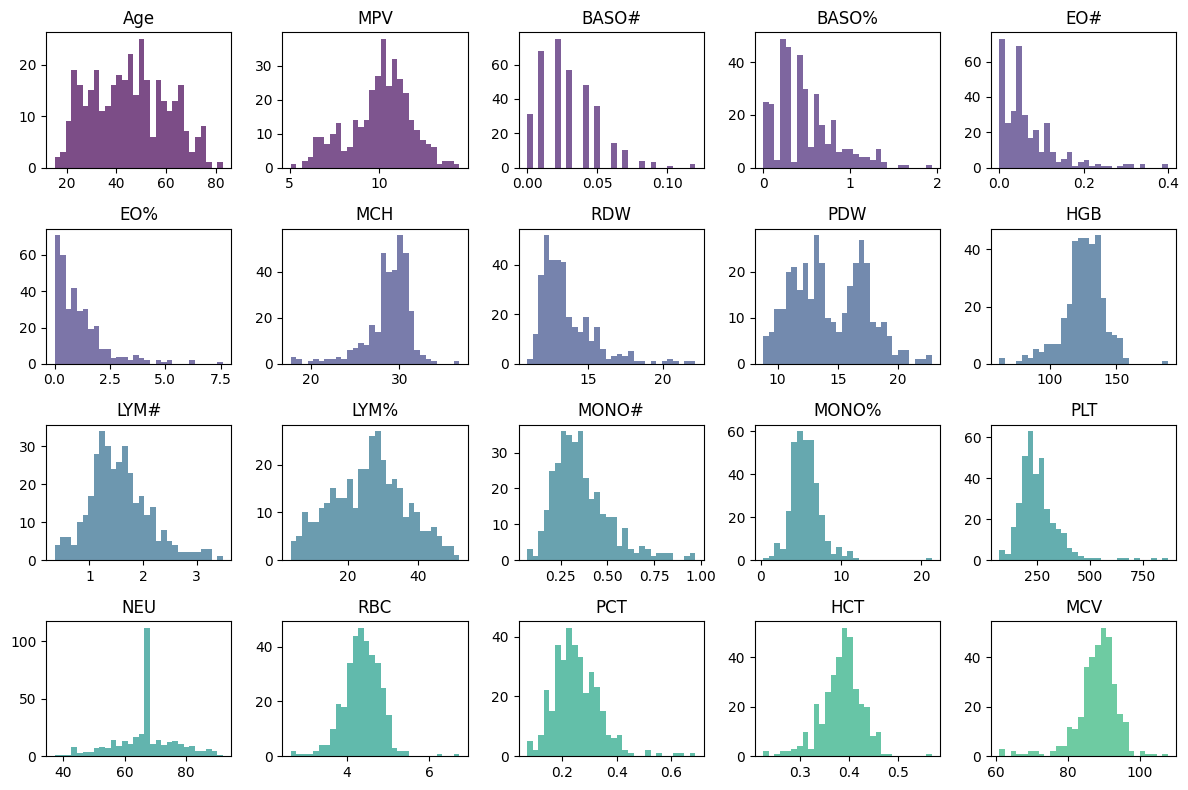

In [13]:
def histogramas(datos, paleta):
    palette = plt.cm.get_cmap(paleta, 30)
    n_plots = len(datos.columns)
    n_rows = int(np.sqrt(n_plots))  # Número de filas
    n_cols = (n_plots + n_rows - 1) // n_rows  # Número de columnas

    # Crear la cuadrícula de subgráficos
    fig, axs = plt.subplots(n_rows, n_cols,figsize=(12, 8))
    # Graficar cada conjunto de datos en su respectivo subgráfico
    for i, column in enumerate(datos.columns):
        ax = axs[i // n_cols, i % n_cols]
        ax.hist(datos[column], bins=30, color=palette(i), alpha=0.7)  # Graficar histograma
        ax.set_title(column, fontsize=12)
        ax.set_facecolor('white')
        ax.grid(False)

    for i in range(n_plots, n_rows * n_cols):
        axs.flatten()[i].axis('off')

    plt.tight_layout()    
    plt.show()

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()

def grafica_hist(variable,name,colour):
        plt.hist(variable, bins=30, color=colour, alpha=0.7)  # Graficar histograma
        plt.set_title(name, fontsize=12)
        plt.set_facecolor('white')
        plt.grid(False)
        plt.tight_layout()    
        plt.show()

histogramas(Blood_Routine.iloc[:,:20],'viridis')


/tmp/ipykernel_1329/2638686498.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap(paleta, 30)


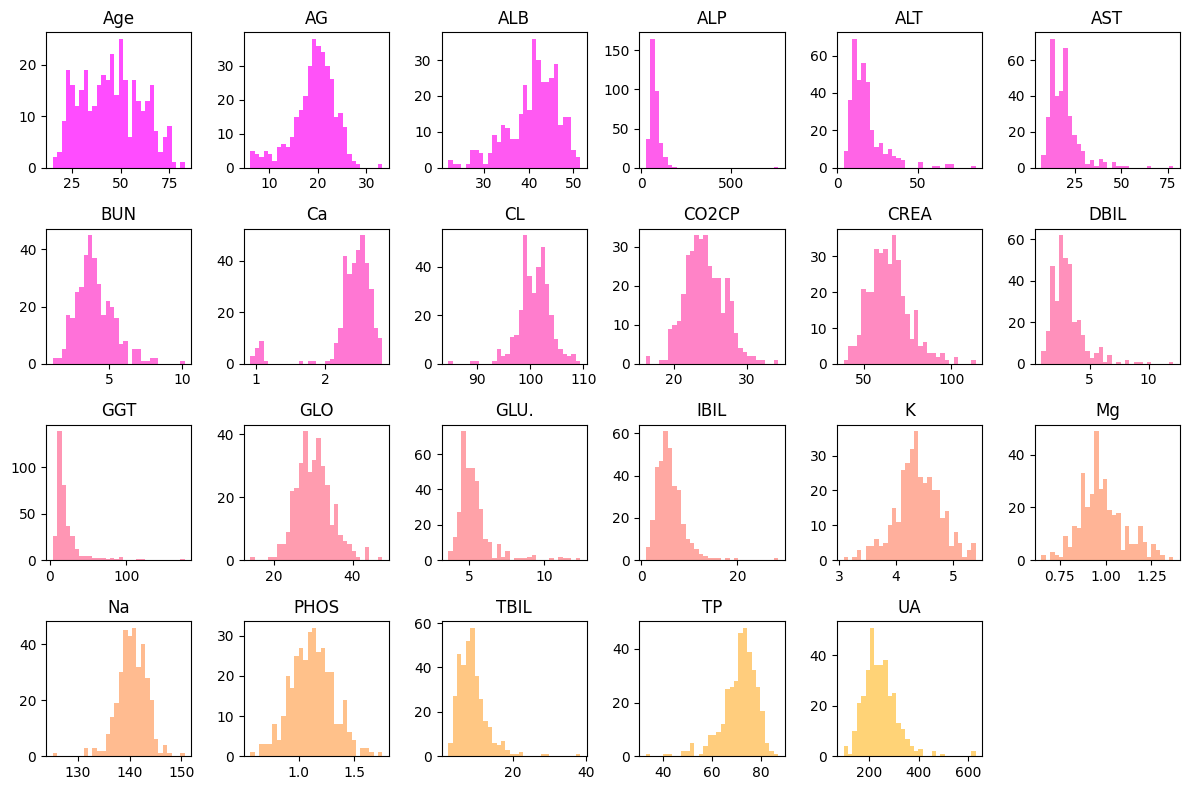

In [14]:
histogramas(General_Chem.iloc[:,:23],'spring')

/tmp/ipykernel_1329/2638686498.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap(paleta, 30)


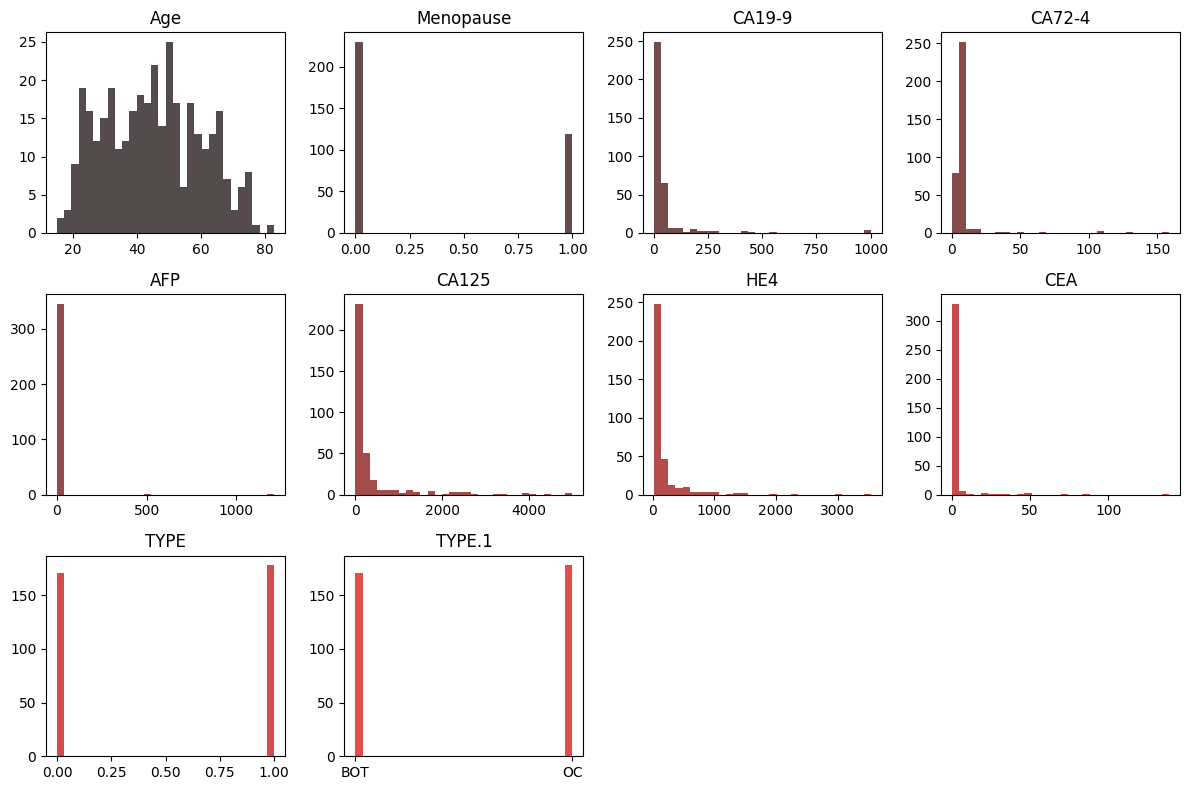

In [15]:
histogramas(Marker,'hot')

En variables anteriormente mencionadas, en las que nos planteamos tener outliers podemos observar que efectivamente obtenemos datos mayores a donde se concentra la mayoría de los datos. Decidimos no eliminar esto datos debido a que en medicina, los datos atipicos pueden otorgarnos información relevante.

#### Correlación

Con la matriz de correlación podemos observar que tan relacionadas se encuentran diversas variables entre si, sin embargo, en nuestro caso tenemos muchas variables, tantas que es complicado visualizar y analizar cada una.

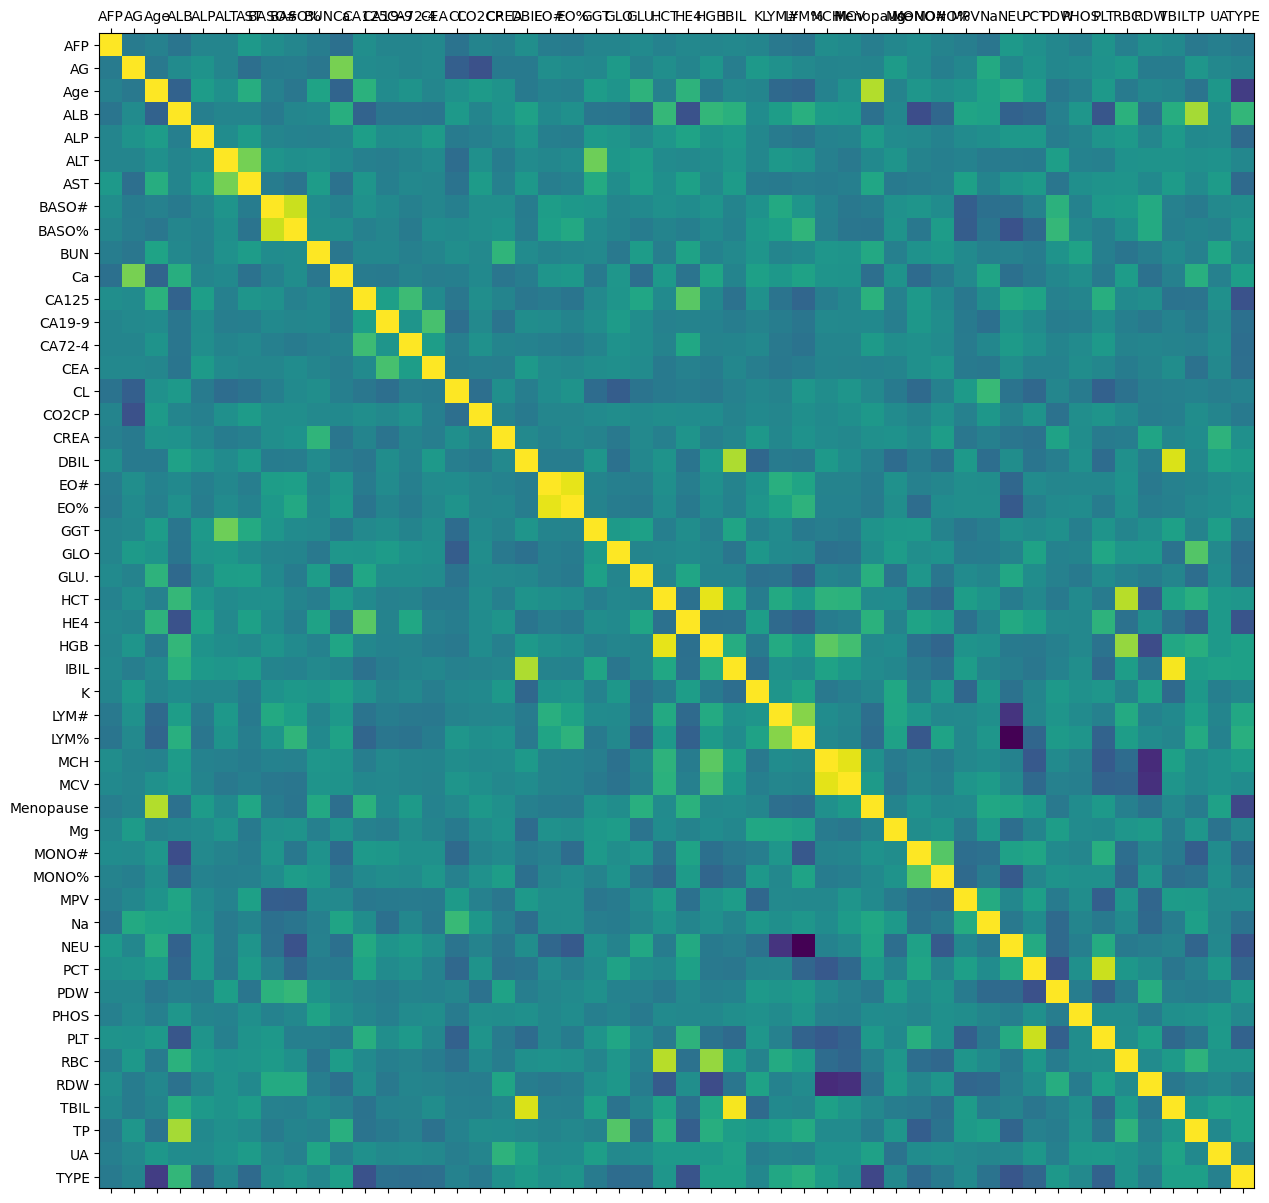

In [19]:
corr_heatmap(OvarianTotal,15)

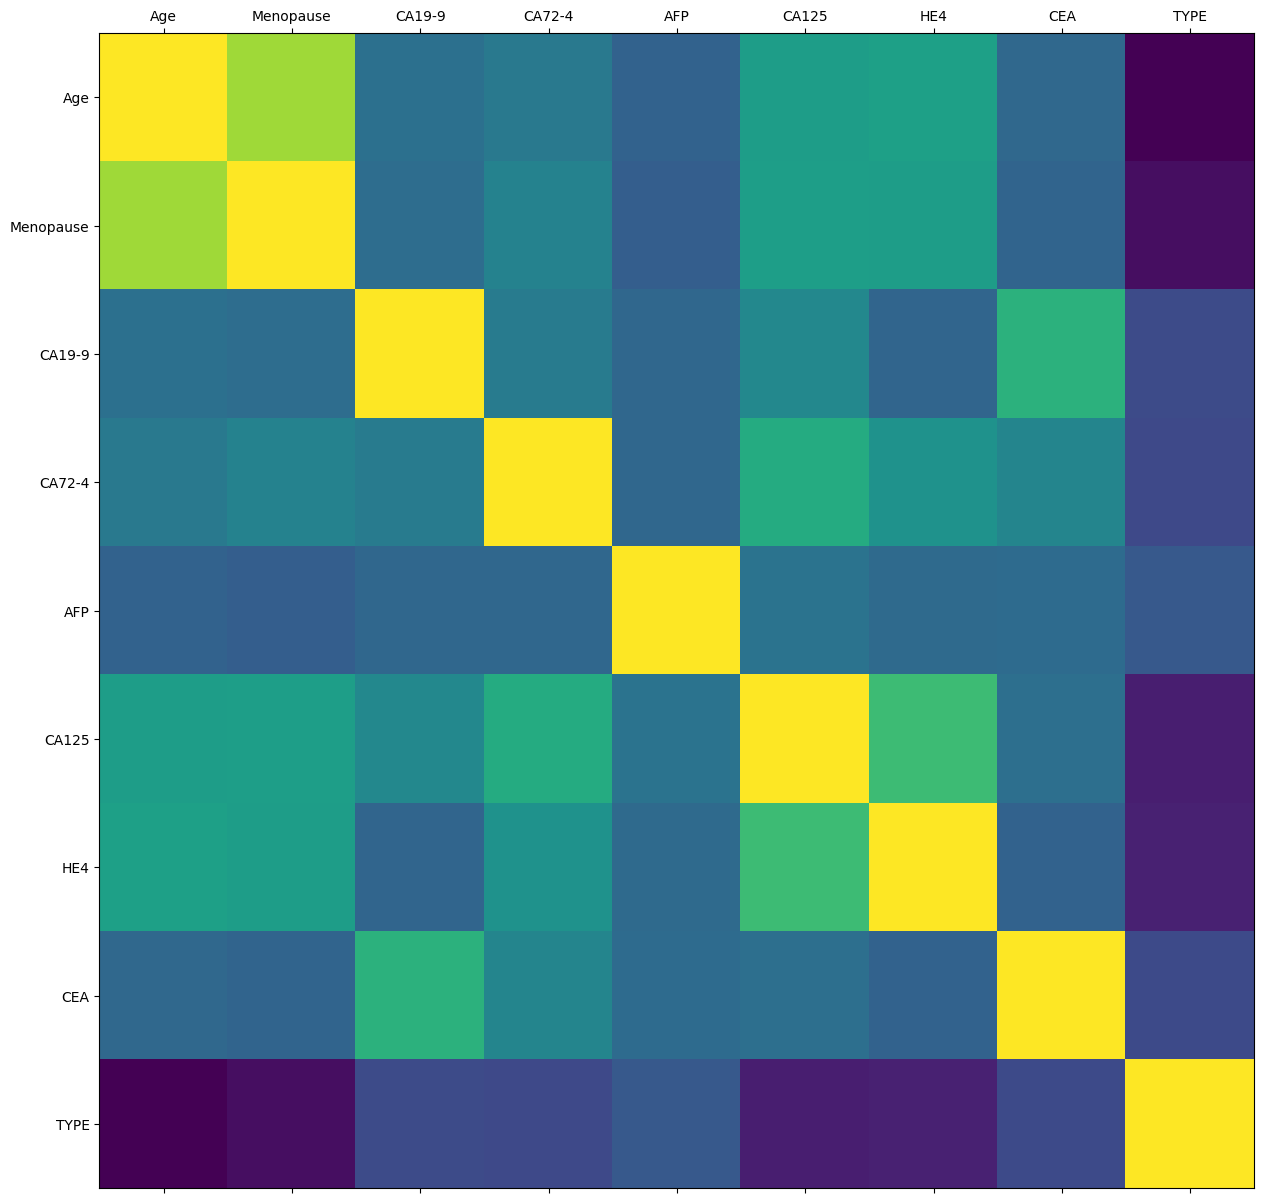

In [20]:
corr_heatmap(Marker.iloc[:,:9],15)

In [21]:
correlation = OvarianTotal.corr()
print(correlation['Menopause'][correlation['Menopause']>0.3])
print(correlation['Menopause'][correlation['Menopause']<-0.3])

Age          0.786053
CA125        0.332175
GLU.         0.313371
HE4          0.329901
Menopause    1.000000
Name: Menopause, dtype: float64
TYPE   -0.45577
Name: Menopause, dtype: float64
